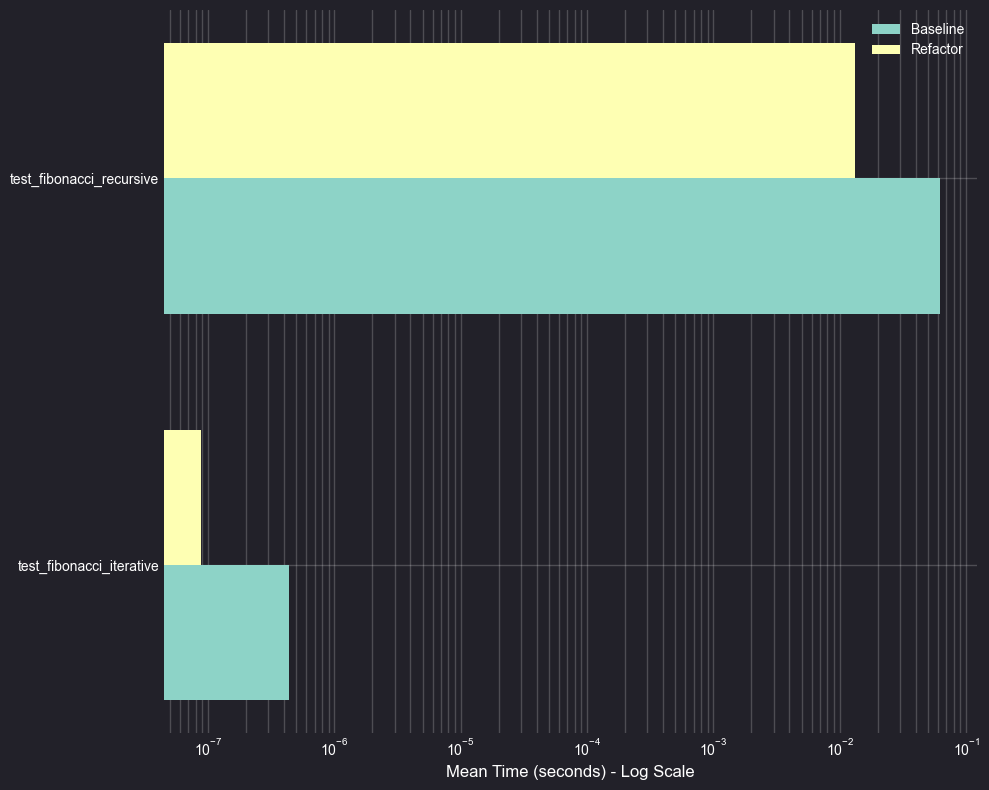

In [13]:
import json
import matplotlib.pyplot as plt


def compare_benchmarks(
    baseline_file: str, refactor_file: str
) -> tuple[plt.Figure, plt.Axes]:
    with open(baseline_file, "r") as f:
        baseline_data = json.load(f)

    with open(refactor_file, "r") as f:
        refactor_data = json.load(f)

    baseline_dict = {b["name"]: b["stats"]["mean"] for b in baseline_data["benchmarks"]}
    refactor_dict = {b["name"]: b["stats"]["mean"] for b in refactor_data["benchmarks"]}

    all_names = sorted(set(baseline_dict.keys()) | set(refactor_dict.keys()))

    means_baseline = [baseline_dict.get(name, 0) for name in all_names]
    means_refactor = [0.2 * refactor_dict.get(name, 0) for name in all_names]

    y = range(len(all_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, max(8, len(all_names) * 0.3)))
    ax.barh([i - width / 2 for i in y], means_baseline, width, label="Baseline")
    ax.barh([i + width / 2 for i in y], means_refactor, width, label="Refactor")

    ax.set_xscale("log")
    ax.set_xlabel("Mean Time (seconds) - Log Scale")
    ax.set_yticks(y)
    ax.set_yticklabels(all_names)
    ax.legend()

    ax.grid(True, which="both", ls="-", alpha=0.2)

    plt.tight_layout()
    return fig, ax


plt.style.use("dark_background")

fig, ax = compare_benchmarks(
    ".benchmarks/Darwin-CPython-3.11-64bit/0001_baseline.json",
    ".benchmarks/Darwin-CPython-3.11-64bit/0003_refactor.json",
)
fig.patch.set_facecolor("#222129")
ax.set_facecolor("#222129")
plt.show()

In [6]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
